In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\New folder\honeyproduction 1998-2021.csv')
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.shape  # finding shape of dataset (rows = 985 and columns =8)

(985, 8)

In [5]:
df.isna().sum()   # no null values found

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [6]:
df.dtypes  # finding data types

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [7]:
df.info()   # Information about Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [8]:
# Understanding Column Data
df.describe()   # statistical info. about data

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07,2021.000000


In [9]:
df['consumption'] = df['totalprod']-df['stocks']  # finding consumption (demand) based on totalprod minus stocks
df.columns

Index(['State', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'consumption'],
      dtype='object')

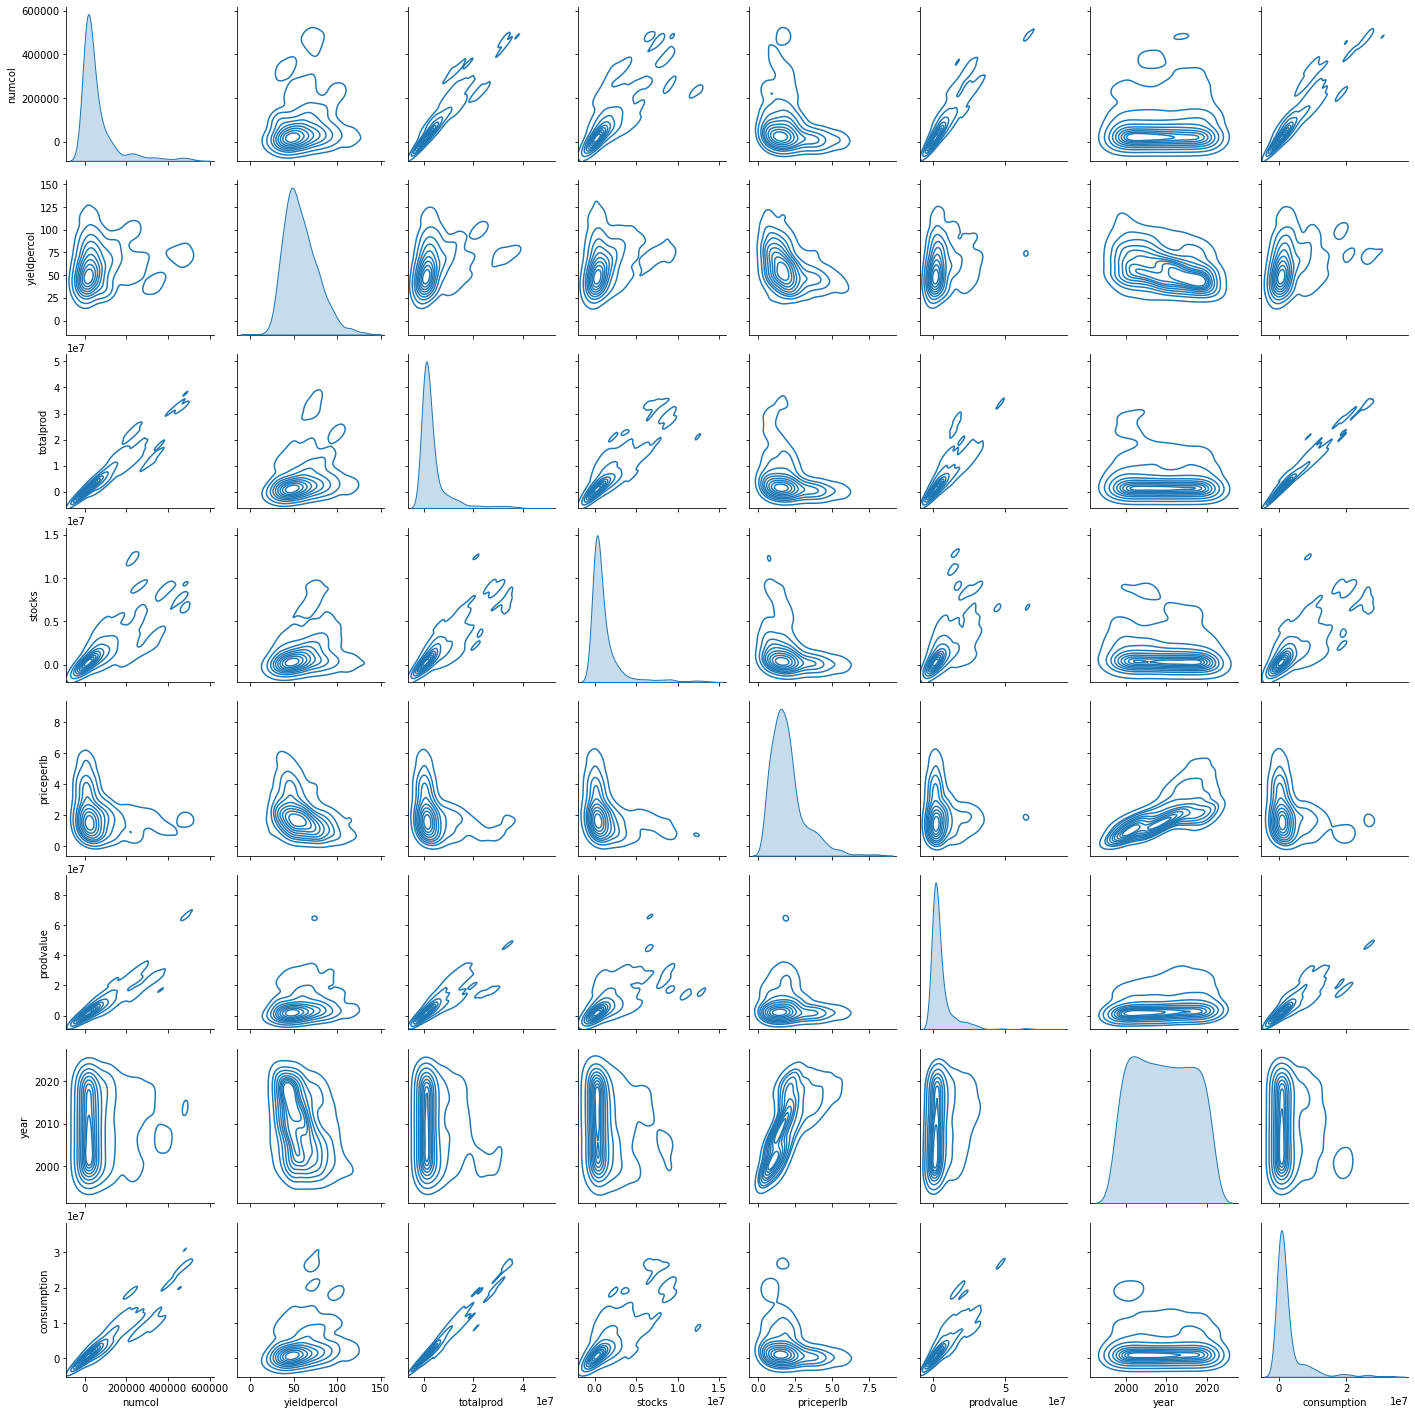

In [10]:
sns.pairplot(df,kind='kde')
plt.show()  # using pair plot

In [11]:
corr=df.corr()  #finding correlation
corr

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,consumption
numcol,1.000000,0.198576,0.949640,0.796897,-0.223360,0.912601,0.034365,0.938806
yieldpercol,0.198576,1.000000,0.364392,0.356294,-0.398247,0.224704,-0.318318,0.339374
totalprod,0.949640,0.364392,1.000000,0.864333,-0.252678,0.900720,-0.048837,0.978193
stocks,0.796897,0.356294,0.864333,1.000000,-0.284894,0.693372,-0.137590,0.741031
priceperlb,-0.223360,-0.398247,-0.252678,-0.284894,1.000000,-0.088529,0.694738,-0.219707
prodvalue,0.912601,0.224704,0.900720,0.693372,-0.088529,1.000000,0.178040,0.916244
year,0.034365,-0.318318,-0.048837,-0.137590,0.694738,0.178040,1.000000,-0.008383
consumption,0.938806,0.339374,0.978193,0.741031,-0.219707,0.916244,-0.008383,1.000000


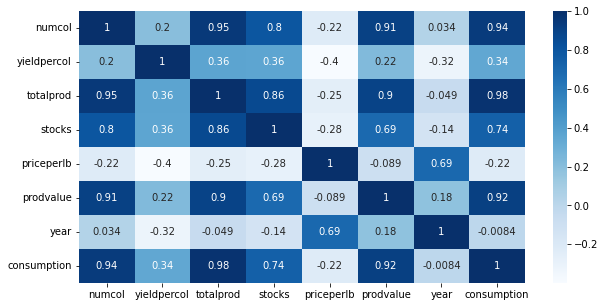

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Blues')  # plotting heatmap to show correlation of the data
plt.show()

### Ques 1. How has honey production yield changed from 1998 to 2021 ?

In [13]:
# creating a new dataframe
data_changed_by_year = df.groupby('year')['totalprod'].mean().round()   # grouping the mean of total production year wise
print(data_changed_by_year)

year
1998    5105093.0
1999    4706674.0
2000    5106000.0
2001    4221545.0
2002    3892386.0
2003    4122091.0
2004    4456805.0
2005    4243146.0
2006    3761902.0
2007    3600512.0
2008    3974927.0
2009    3626700.0
2010    4382350.0
2011    3680025.0
2012    3522675.0
2013    3800103.0
2014    4421650.0
2015    3884400.0
2016    4008925.0
2017    3654125.0
2018    3773725.0
2019    3887600.0
2020    3655475.0
2021    3127925.0
Name: totalprod, dtype: float64


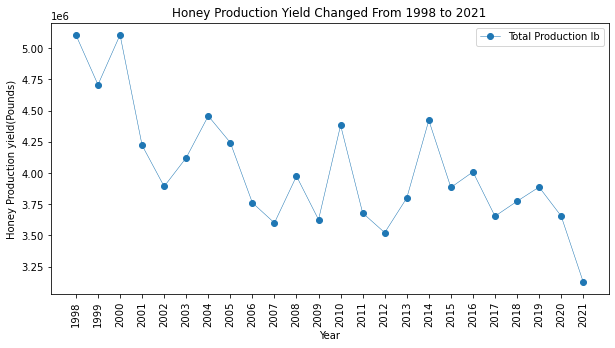

In [14]:
plt.figure(figsize=(10,5))  # setting figure size
plt.plot(data_changed_by_year.index,data_changed_by_year.values,linewidth=0.5,marker='o',label='Total Production lb')
plt.xlabel('Year') #setting label on x axis
plt.ylabel('Honey Production yield(Pounds)')  # setting label on y axis
plt.xticks(data_changed_by_year.index,rotation=90)   #rotating the values of x label by 90 degrees
plt.title('Honey Production Yield Changed From 1998 to 2021')  #setting title to a plot
plt.legend()  #showing label on the plot
plt.show()  # showing the plot

### Ques 2. Overtime , what are the major production trends across the states

In [15]:
df['State'].value_counts()  #counting the total values of the States

Alabama           24
Montana           24
New Jersey        24
New York          24
North Carolina    24
North Dakota      24
Ohio              24
Oregon            24
Pennsylvania      24
South Dakota      24
Tennessee         24
Texas             24
Utah              24
Vermont           24
Virginia          24
Washington        24
West Virginia     24
Wisconsin         24
Wyoming           24
Arizona           24
Nebraska          24
Missouri          24
Iowa              24
Arkansas          24
California        24
Colorado          24
Florida           24
Georgia           24
Hawaii            24
Idaho             24
Illinois          24
Indiana           24
Kansas            24
Mississippi       24
Kentucky          24
Louisiana         24
Maine             24
Michigan          24
Minnesota         24
New Mexico        15
Nevada            11
South Carolina    11
Oklahoma           6
Maryland           6
Name: State, dtype: int64

In [16]:
df['State'].nunique() # finding the no. of unique states
     

44

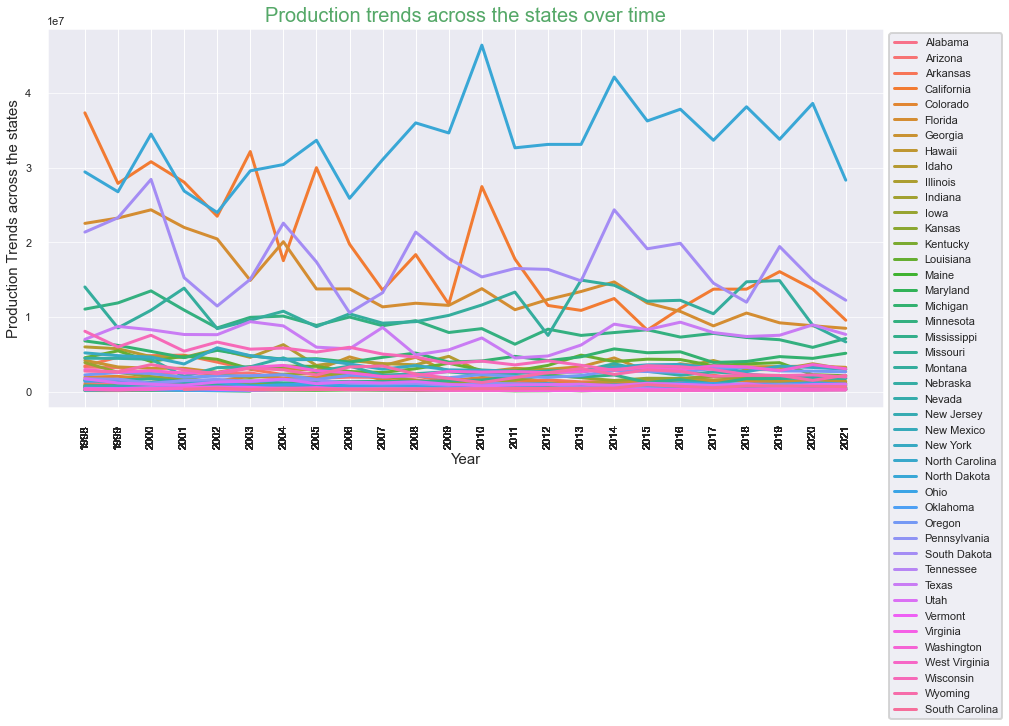

In [17]:
sns.set(rc={'figure.figsize':(15,7)}) # To resize the plot
sns.set_style('darkgrid')  # setting style for my plot
sns.set_context('poster',font_scale=0.5,rc={'grid.linewidth':0.7})  # setting font_scale and line_width of the grid for my plot
sns.set_palette('coolwarm')  # settingcolor_palette for my plot
sns.lineplot(x='year', y='totalprod', data=df, hue = 'State')
plt.xlabel('Year',size=15)
plt.ylabel('Production Trends across the states',size=15)
plt.legend(bbox_to_anchor=(1, 1))  #using bbox_to_anchor function for properly labelling the countries out of the plot area
plt.xticks(df['year'],rotation=90) #rotating  the x axis by 90 degrees
plt.title('Production trends across the states over time',color='g',size=20)  #settig the title
plt.show() # showing the plot
     

<Figure size 1440x720 with 0 Axes>

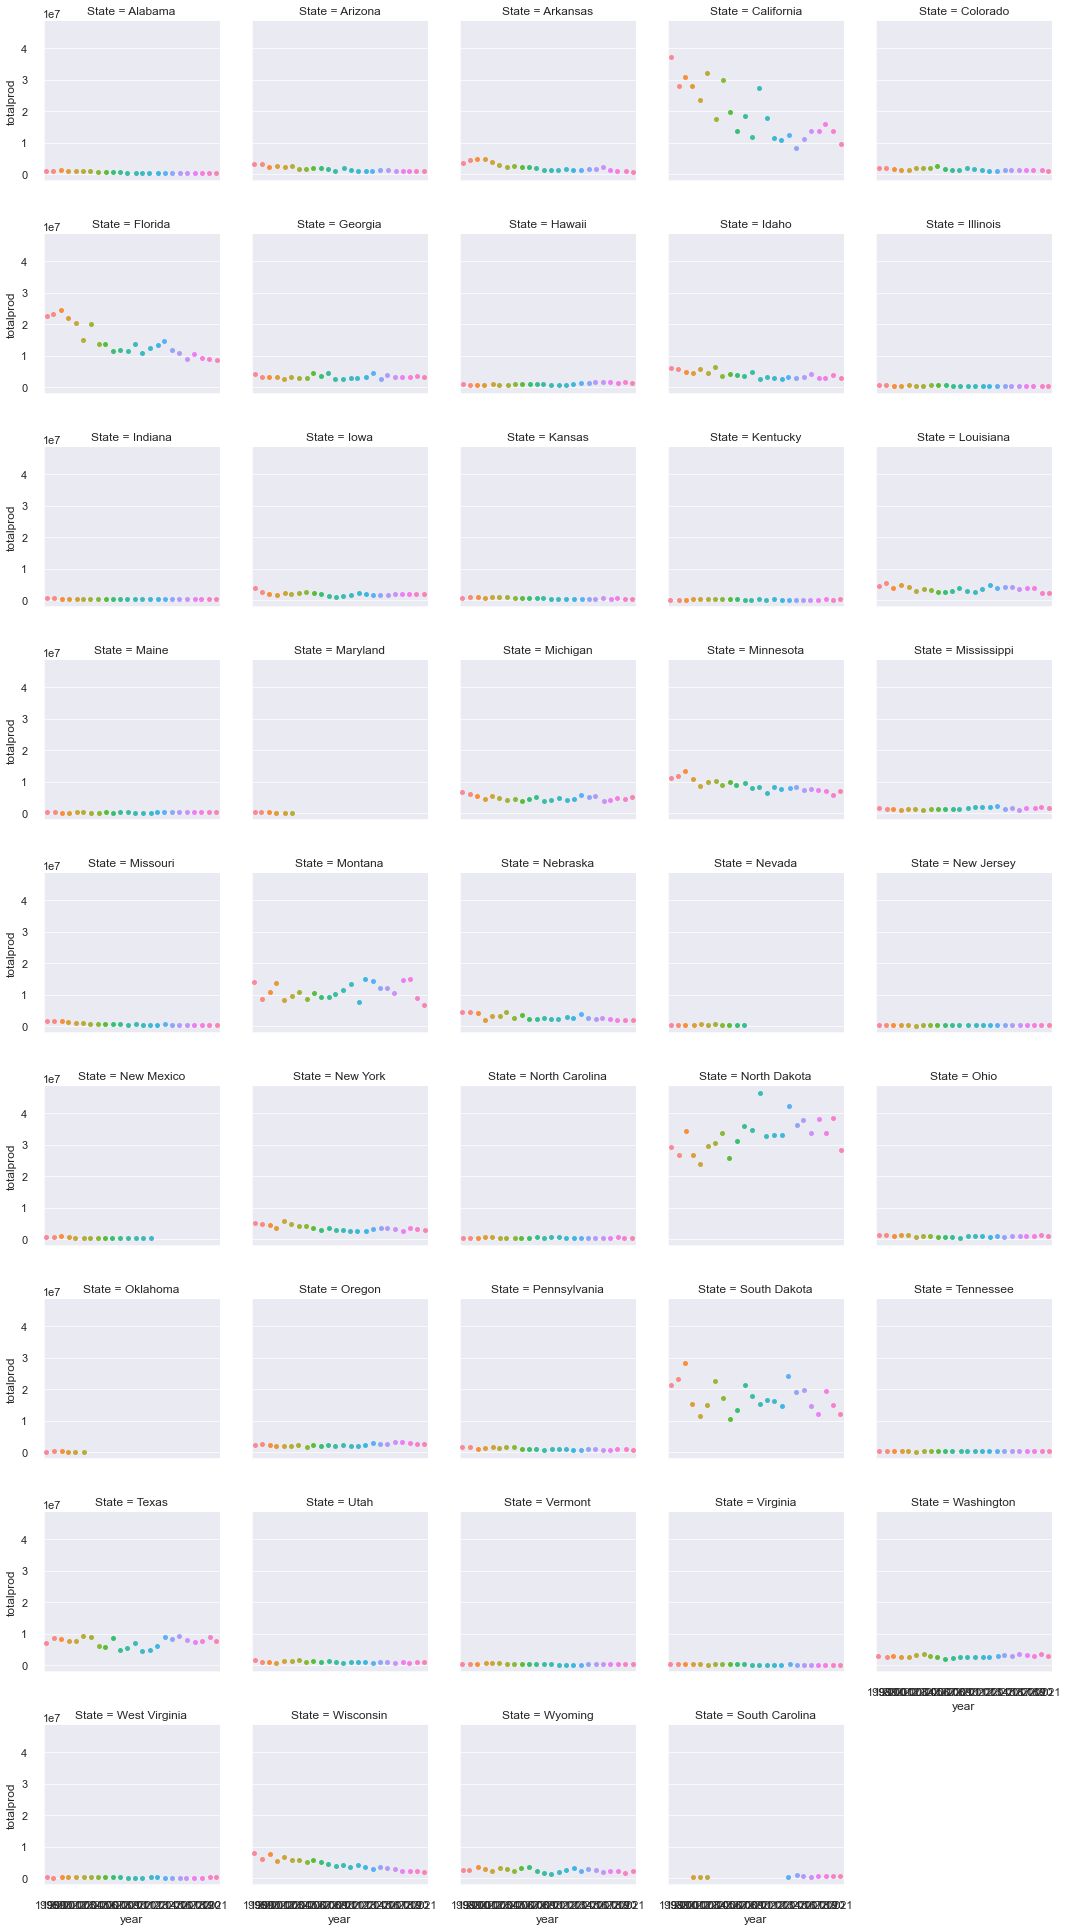

In [18]:
plt.figure(figsize=(20,10))  #setting figure size
sns.catplot(data=df,x='year', y='totalprod', col='State', kind='strip',height=3,col_wrap=5)  #using catplot for accurate visualization of the production trends across the state
plt.show() # showing the plot

###  Ques 3 . Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006,which was when concern over Colony Collapse Disorder spread nationwide ?

In [19]:
data_before_2006=df[df['year']<2006]  # finding the sorted data of before 2006
df_before_2006 = data_before_2006.groupby('year')[['numcol','yieldpercol']].mean()  # grouping the numcol and yieldpercol year wise
df_before_2006  

,numcol,yieldpercol
year,,
1998,60953.488372,69.953488
1999,61325.581395,65.465116
2000,60558.139535,67.581395
2001,57772.727273,64.545455
2002,58295.454545,66.795455
2003,58886.363636,62.545455
2004,61926.829268,64.804878
2005,58390.243902,64.268293


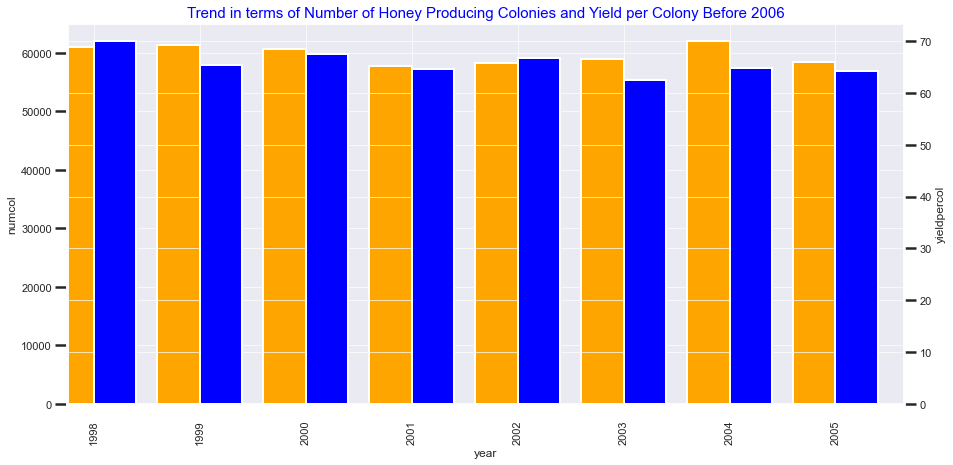

In [20]:
fig = plt.figure() #setting  plt figure

ax = fig.add_subplot(111) #setting plot axis
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4  #setting width
#customizing first variable bars with color axis , width and position
df_before_2006['numcol'].plot(kind='bar', color='orange', ax=ax, width=width, position=1)  
#customizing second variable bars with color axis , width and position
df_before_2006['yieldpercol'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
#setting y label for first variable
ax.set_ylabel('numcol')
#setting y label for another variable
ax2.set_ylabel('yieldpercol')
# rotating x axis by 90 degrees 
plt.title('Trend in terms of Number of Honey Producing Colonies and Yield per Colony Before 2006' ,size=15 , color='Blue')  #setting title with its size and color
plt.show() # showing the plot

### Ques 4. Are there any patterns that can be observed between total honey production and value of production every year?

In [21]:
hd2 = df.groupby('year')[['totalprod','prodvalue']].sum()   # grouping the total of totalprod and prodvalue on the basis of year
hd2

,totalprod,prodvalue
year,,
1998,219519000.0,146091000.0
1999,202387000.0,123657000.0
2000,219558000.0,131568000.0
2001,185748000.0,132282000.0
2002,171265000.0,227302000.0
2003,181372000.0,252079000.0
2004,182729000.0,197307000.0
2005,173969000.0,160793000.0
2006,154238000.0,157924000.0


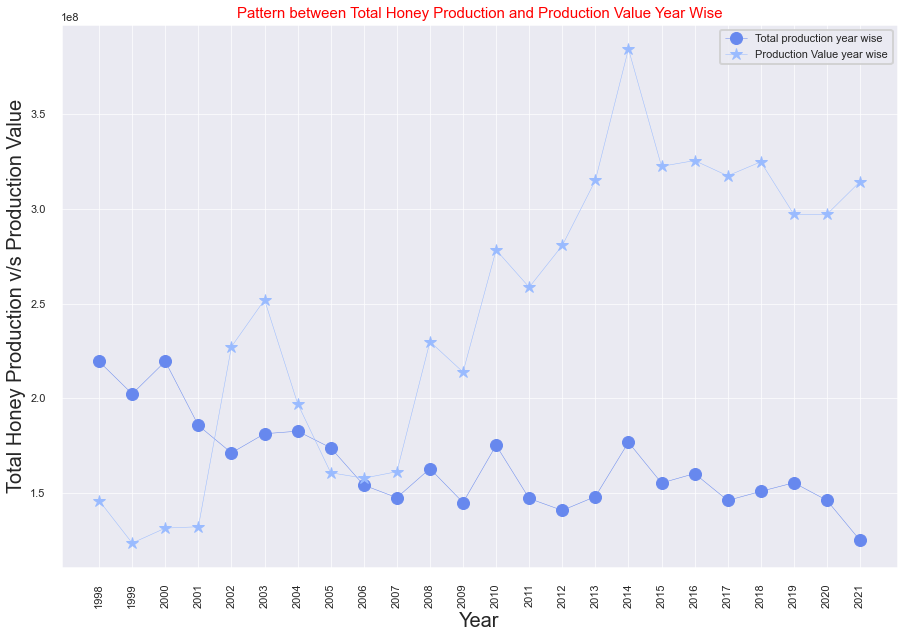

In [22]:
plt.figure(figsize=(15,10)) # setting plt figure size
plt.plot(hd2.index,hd2['totalprod'],linewidth=0.5,marker='o',label='Total production year wise') #plotting line plot  of values of total production year wise
plt.plot(hd2.index,hd2['prodvalue'],linewidth=0.5,marker='*',label='Production Value year wise') #plotting line plot of values of production value year wise
plt.xlabel('Year' ,size=20)  # setting x label
plt.ylabel('Total Honey Production v/s Production Value',size=20) #setting y label
plt.xticks(hd2.index,rotation=90)  #Rotating x axis by 90 degrees
plt.title('Pattern between Total Honey Production and Production Value Year Wise' ,size=15 , color='Red')  #Setting title for the plot
plt.legend()  # showing label at the plot
plt.show()  # showing the plot

### Ques 5. How has the value of production , which in some sense could be tied to demand , changed every year.

consumption = Totalprod - Stocks

In [23]:
hd3 = df.groupby('year')[['prodvalue','consumption']].mean()  # grouping the mean of production value and consumption year wise
hd3

,prodvalue,consumption
year,,
1998,3.397465e+06,3.231488e+06
1999,2.875744e+06,2.883651e+06
2000,3.059721e+06,3.130279e+06
2001,3.006409e+06,2.749636e+06
2002,5.165955e+06,3.002000e+06
2003,5.729068e+06,3.198932e+06
2004,4.812366e+06,2.969463e+06
2005,3.921780e+06,2.726390e+06
2006,3.851805e+06,2.292756e+06


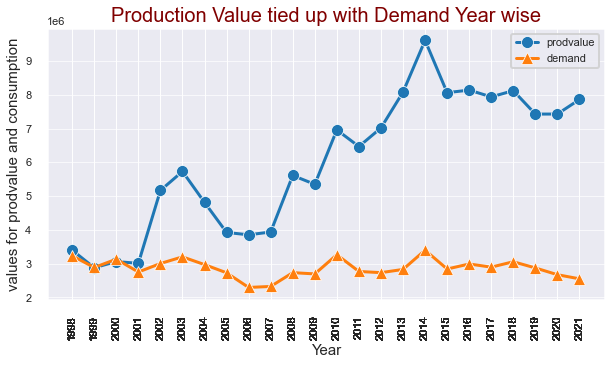

In [24]:
sns.set(rc={'figure.figsize':(10,5)})  #setting the figure size
sns.set_style('darkgrid')  # setting the style
sns.set_context('poster',font_scale=0.5,rc={'grid.linewidth':0.7})  #setting the font_scale and line_width of the grid
sns.set_palette('tab10') #setting the color palette
sns.lineplot(data=hd3,x='year',y='prodvalue',marker='o', label='prodvalue')  # plotting the line plot of prodvalue year wise
sns.lineplot(data=hd3,x='year',y='consumption',marker='^',label='demand') # plotting the line lot of consumption year wise
plt.xlabel('Year',size=15) # setting x label
plt.ylabel('values for prodvalue and consumption',size=15) # setting y label
plt.xticks(df['year'],rotation=90) # rotating values of x axis by 90 degrees
plt.title('Production Value tied up with Demand Year wise',color='maroon',size=20) # setting the title for the plot
plt.legend() #showing label to the plot
plt.show()  # showing the plot

### QUES 6 Constructs the related plots using Seaborn and Matplot apply customization and derive insights from the visualization.

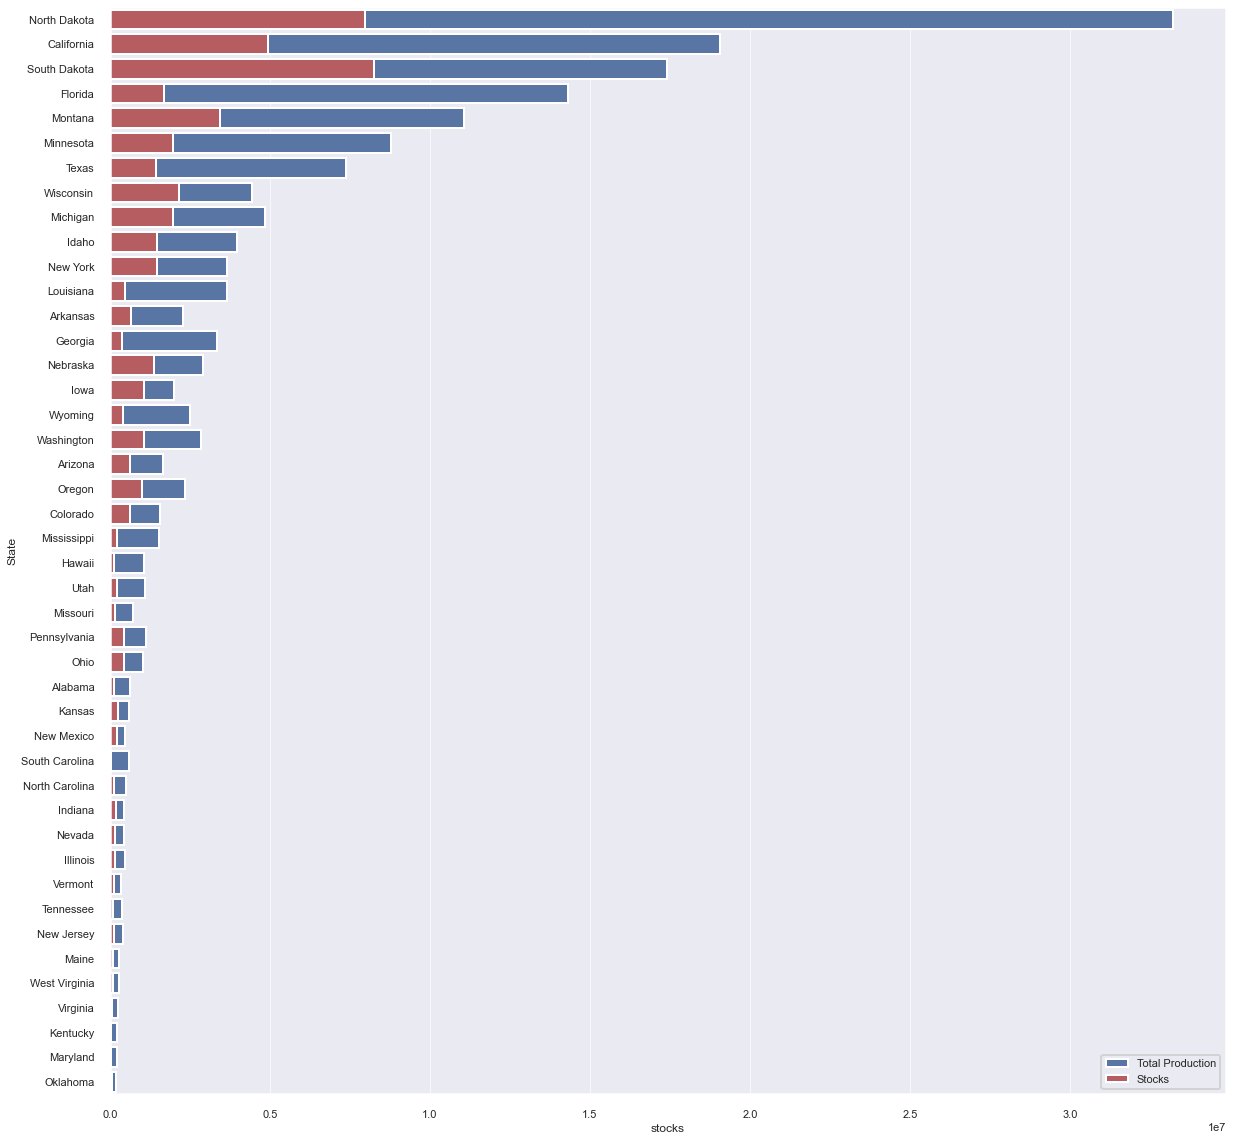

In [25]:
plt.figure(figsize=(20,20))#setting the figure 
sns.barplot(x='totalprod',y='State',data=df.sort_values('totalprod',ascending=False),color='b',label='Total Production',ci=None)  # showing the bar plot of total production state wise
sns.barplot(x='stocks',y='State',data=df.sort_values('totalprod',ascending=False),color='r',label='Stocks',ci=None)    # showing the bar plot of stocks of state wise
plt.legend() #showing the label to the plot
plt.show()  #showing the plot

OBSERAVTIONS:

            1-NORTH DAKOTA IS A STATE WHICH HAVE A HIGHEST PRODUCTION AND AGREAT AMOUNT OF STOCKS LEFT.
            2-SOUTH DAKOTA IS THE STATE WHICH HAVE THE HIGHEST AMOUNT OF STOCK LEFT.
            3-OKLAHOMA IS A STATE WHICH HAVE NO STOCKS LEFT AND HAVE THE LOWEST TOTAL PRODUCTION.